In [1]:
!pip install boto3 tqdm ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/66

In [3]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLOv8_Model/best.pt")

# Evaluate the model on the validation set
metrics = model.val(data="/content/drive/MyDrive/Combined_Dataset/dataset.yaml",
                    imgsz=640,
                    conf=0.3)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]
val: Scanning /content/drive/MyDrive/Combined_Dataset/labels/val.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Combined_Dataset/images/val/val_2.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Combined_Dataset/images/val/val_209.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Combined_Dataset/images/val/val_334.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [01:04<00:00, 32.48s/it]


                   all         25       3644      0.796      0.687      0.749      0.405
               product         25       3452      0.871      0.859      0.903       0.57
                missed         25        192      0.722      0.514      0.594      0.241
Speed: 7.2ms preprocess, 1883.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


In [4]:
# Main Metrics
print(f"mAP@0.5: {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")
print(f"Precision: {metrics.box.mp:.3f}")
print(f"Recall: {metrics.box.mr:.3f}")

mAP@0.5: 0.749
mAP@0.5:0.95: 0.405
Precision: 0.796
Recall: 0.687


In [5]:
# Metrics per class
for i, cls in enumerate(metrics.box.ap_class_index):
    print(f"Clase: {cls}")
    print(f"   Precision: {metrics.box.p[i]:.3f}")
    print(f"   Recall: {metrics.box.r[i]:.3f}")
    print(f"   AP@0.5: {metrics.box.ap50[i]:.3f}")
    print(f"   AP@0.5:0.95: {metrics.box.ap[i]:.3f}")

Clase: 0
   Precision: 0.871
   Recall: 0.859
   AP@0.5: 0.903
   AP@0.5:0.95: 0.570
Clase: 1
   Precision: 0.722
   Recall: 0.514
   AP@0.5: 0.594
   AP@0.5:0.95: 0.241


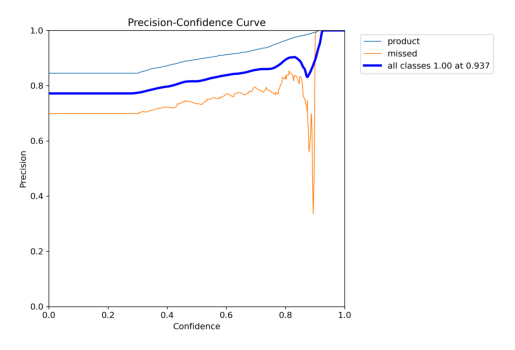

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/runs/detect/val/P_curve.png")

plt.imshow(img)
plt.axis("off")
plt.show()

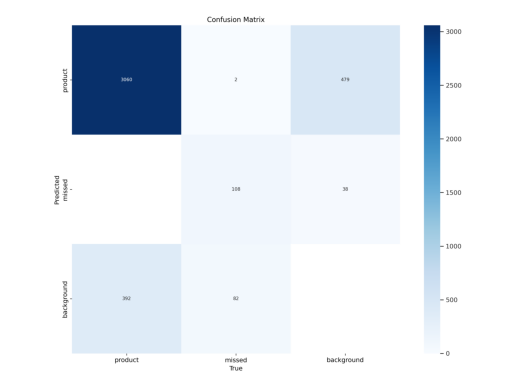

In [20]:
img = mpimg.imread("/content/runs/detect/val/confusion_matrix.png")

plt.imshow(img)
plt.axis("off")
plt.show()

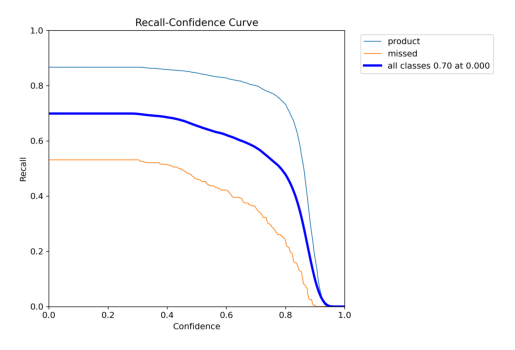

In [21]:
img = mpimg.imread("/content/runs/detect/val/R_curve.png")

plt.imshow(img)
plt.axis("off")
plt.show()